*******************************  MLSL2 GROUP ASSIGNMENT **********************************************************

NAME : VAIBHAV DIXIT  

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
eureka_data=pd.read_csv("D:/ISB_AMPBA/Term4/MLSL2/eureka_train.csv")

In [4]:
eureka_data.head()

,index,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,...,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,callclick_in_7days,converted
0,574305,0.0,0.0,0,0.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,283735,0.0,0.0,0,8.0,0.0,0.0,i,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,377029,0.0,0.0,0,0.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,75833,1.0,0.0,0,0.0,0.0,532.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,703487,0.0,0.0,0,1.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Find the following insights (Draw an appropriate plot, whenever necessary).


4.	Kashif has the following claims from this business understanding. How do you test his claims and make necessary conclusions?
a.	Customers using mobile, desktop, and tablet are equally distributed.
b.	Customers who convert spend more time on the website.


1.	What is the difference in percentage of conversion by domestic compared to international clients?

In [5]:
d_conv_cnt = eureka_data[(eureka_data.country == 'd') & (eureka_data.converted == 1)].converted.value_counts()
i_conv_cnt = eureka_data[(eureka_data.country == 'i') & (eureka_data.converted == 1)].converted.value_counts()

conv_diff = ((d_conv_cnt-i_conv_cnt)/d_conv_cnt) *100
conv_diff

1    95.955882
Name: converted, dtype: float64

Percentage difference by domestic compared to International clients is 95.9%

2.	What are the top 10 source mediums of users visiting the site?
Below are the top 10 source mediums of users visiting the site

In [6]:
eureka_data.sourceMedium.value_counts().head(10)

google / cpc                      30428
google / organic                   8276
(direct) / (none)                  2734
facebook / social                   329
bing / organic                      143
Quora / (not set)                    48
gaintheory / amc_sms                 37
draquaguard.co.in / referral         28
in.search.yahoo.com / referral       27
yahoo / organic                      27
Name: sourceMedium, dtype: int64

3.	Is there any difference in time spent on the water purifier page between users who converted and users who did not convert?
Ans: Below we can see that there is a difference in average time spent by the users converted and non converted for water purifier page

In [7]:
wp_conv=eureka_data[(eureka_data.visited_water_purifier_page == 1) &  (eureka_data.converted == 1)].water_purifier_page_top.sum()
no_user_conv=eureka_data[(eureka_data.visited_water_purifier_page == 1) &  (eureka_data.converted == 1)].converted.value_counts()
wpn_conv=eureka_data[(eureka_data.visited_water_purifier_page == 1) &  (eureka_data.converted == 0)].water_purifier_page_top.sum()
no_user_non_conv=eureka_data[(eureka_data.visited_water_purifier_page == 1) &  (eureka_data.converted == 0)].converted.value_counts()

## Average timestamp for converted users 
avg_time_conv=(wp_conv/no_user_conv)

avg_time_non_conv=(wpn_conv/no_user_non_conv)

print("Average time for Converted Users",avg_time_conv)

print("Average time for Non Converted Users",avg_time_non_conv)

Average time for Converted Users 1    425.78869
Name: converted, dtype: float64
Average time for Non Converted Users 0    314.288717
Name: converted, dtype: float64


4.	Kashif has the following claims from this business understanding. How do you test his claims and make necessary conclusions?
a.	Customers using mobile, desktop, and tablet are equally distributed.


Ans: H0 = Equally distributed
     H1 = Not Equally distributed
     
Performing ANOVA test, we can see that P-value is significant. Therefore, We cannot reject the null hypothesis and can say that data is uniformly distributed

In [8]:
import pandas as pd
eureka_data_ed = pd.DataFrame()
eureka_data_ed=eureka_data[['device','converted']]

In [9]:
eureka_data_ed['device'] = pd.Categorical(eureka_data_ed.device)

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
model = ols('converted ~ C(device)', data=eureka_data_ed).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(device),8.108362,2.0,80.264525,1.612864e-35
Residual,2134.613576,42261.0,NaN,NaN


In [12]:
eureka_data_ed.head()

,device,converted
0,mobile,0
1,mobile,0
2,mobile,0
3,mobile,0
4,mobile,0


(array([36370.,     0.,     0.,     0.,     0.,  5545.,     0.,     0.,
            0.,   349.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

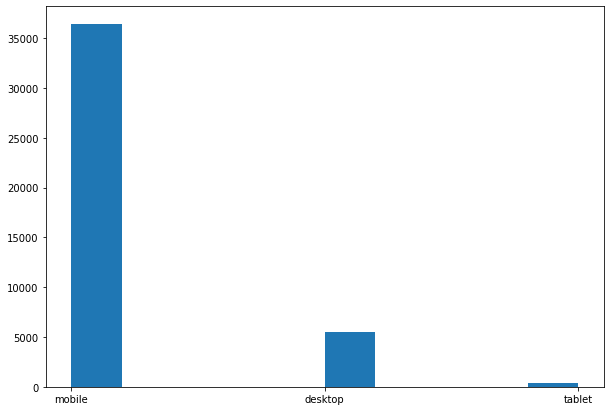

In [13]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(eureka_data.device)

b.	Customers who convert spend more time on the website.
The comment that customers who convert spend more time on website is in alignment with the below calculations

In [14]:
total_conv_time=eureka_data[(eureka_data.converted == 1)].sessionDuration.sum()
total_conv_cust=eureka_data[(eureka_data.converted == 1)].converted.value_counts()
Avg_session_time_conv=(total_conv_time/total_conv_cust)
total_non_conv_time=eureka_data[(eureka_data.converted == 0)].sessionDuration.sum()
total_non_conv_cust=eureka_data[(eureka_data.converted == 0)].converted.value_counts()
Avg_session_time_non_conv=(total_non_conv_time/total_non_conv_cust)

print("Average session time for converted customer",Avg_session_time_conv)

print("Average session time for non converted customer",Avg_session_time_non_conv)


Average session time for converted customer 1    340.963339
Name: converted, dtype: float64
Average session time for non converted customer 0    313.053625
Name: converted, dtype: float64


Design minimum of 8 experiments should have been attempted for finding the best model.
o	At least two different approaches to deal with data imbalance problems
o	At least two different data encoding techniques
o	At least four different models (with combination of above encodings and data augmentation techniques)
o	The model’s hyperparameters should have been selected through grid search mechanisms


From the below pie-chart we can see that data is highly imbalance and we need to use balance it before performing any experiment

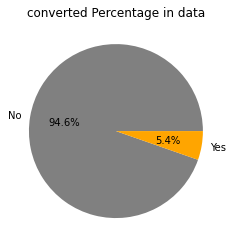

In [15]:
from matplotlib import pyplot as plt
import numpy as np
count = eureka_data['converted'].value_counts(sort = True)
colors = ["grey","orange"] 
labels=['No','Yes']
#plotting pie chart
plt.pie(count,labels=labels, colors=colors,autopct='%1.1f%%')
plt.title('converted Percentage in data')
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

#correlation
correlation = eureka_df_v3.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

- Based on the above unique values and correlation matrix we observed that Columns index, bookdemo_in_7days , goal3Completions ,goal4Completions, goal7Completions , callclick_in_7days have only 1 unique value
- So these columns can be dropped as these are not making any value add.

In [16]:
eureka_data=eureka_data.drop('index',axis=1)
eureka_data=eureka_data.drop('bookdemo_in_7days',axis=1)
eureka_data=eureka_data.drop('goal3Completions',axis=1)
eureka_data=eureka_data.drop('goal4Completions',axis=1)
eureka_data=eureka_data.drop('goal7Completions',axis=1)
eureka_data=eureka_data.drop('callclick_in_7days',axis=1)

In [17]:
eureka_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42264 entries, 0 to 42263
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DemoReqPg_CallClicks_evt_count          42264 non-null  float64
 1   air_purifier_page_top                   42264 non-null  float64
 2   bounces                                 42264 non-null  float64
 3   checkout_page_top                       42264 non-null  float64
 4   contactus_top                           42264 non-null  float64
 5   country                                 42264 non-null  object 
 6   customer_service_amc_login_top          42264 non-null  float64
 7   customer_service_request_login_top      42264 non-null  float64
 8   demo_page_top                           42264 non-null  float64
 9   device                                  42264 non-null  object 
 10  dsls                                    42264 non-null  in

In [18]:
## Checking for null values we can see that there are no null values
eureka_data.isnull().values.any()

False

Experiment 1 
- Here we have used random undersampling Technique
- Also One hot encoding technique for categorical variables
- The model used is Logistic Regression where accuracy of the model
  :- before classification is 65%
  :- After Grid search the accuracy is 70%
  :- Precision also increases from 9% to 10% after Grid search
- Using L1 feature selection method we have tried and used the best features where after that we can see that the Preicion is increased to 40%
- The model pipeline have been exported into pkl file

In [19]:
eureka_data_e1 = eureka_data

In [20]:
### Splitting the data into train and test into 70:30 ratio
X_e1=eureka_data_e1.drop('converted',axis=1)
Y_e1=eureka_data_e1['converted']

In [21]:
from sklearn.model_selection import train_test_split
X_train_e1, X_test_e1, y_train_e1, y_test_e1 = train_test_split(X_e1,Y_e1, test_size=0.3)
print (X_train_e1.shape, y_train_e1.shape)
print (X_test_e1.shape, y_test_e1.shape)

(29584, 41) (29584,)
(12680, 41) (12680,)


Using Random Under Sampling 

In [22]:
###  random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over_e1, y_over_e1 = undersample.fit_resample(X_train_e1, y_train_e1)
# summarize class distribution
print(Counter(y_over_e1))

Counter({0: 1554, 1: 1554})


In [23]:
### Non imputed variables
non_imputed_num_vars = ['DemoReqPg_CallClicks_evt_count','air_purifier_page_top','bounces','checkout_page_top',
'contactus_top','customer_service_amc_login_top','customer_service_request_login_top','demo_page_top',
'dsls','help_me_buy_evt_count','offer_page_top','pageviews','phone_clicks_evt_count','security_solutions_page_top',
'sessionDuration','sessions','storelocator_top','successbookdemo_top','vacuum_cleaner_page_top',
'water_purifier_page_top']

In [24]:
### Categorical Variables
cat_vars = ['country','device','region','sourceMedium']

Encode Categorical Variables

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

Scaling Numerical Vars

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Creating Pipeline

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
non_imputed_num_transformer = Pipeline( steps = [('scaler', scaler)])

In [30]:
cat_transformer = Pipeline( steps = [('ohencoder', ohe_encoder)])

In [31]:
preprocessor = ColumnTransformer(
    transformers=[  
        ('num_not_imputed', non_imputed_num_transformer, non_imputed_num_vars),
        ('catvars', cat_transformer, cat_vars)])

In [32]:
from sklearn.linear_model import LogisticRegression
Log_reg_e1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [33]:
Log_reg_e1.fit(X_over_e1,y_over_e1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                         

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [35]:
Log_reg_e1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                                   'pageviews',
                                                   'phone_clicks_evt_count',
                                                   'security_solutions_page_top',
                                                   'sessionDuration',
                                                   'sessions',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top']),
                                                 ('catvars',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier', LogisticRegression())])

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [39]:
LOGy_pred = Log_reg_e1.predict(X_over_e1)
print("LG:",classification_report(LOGy_pred,y_over_e1),confusion_matrix(y_over_e1, LOGy_pred))
print(" ")
print('Accuracy Score is  :' ,Log_reg_e1.score(X_over_e1,y_over_e1))

LG:               precision    recall  f1-score   support

           0       0.68      0.64      0.66      1638
           1       0.62      0.66      0.64      1470

    accuracy                           0.65      3108
   macro avg       0.65      0.65      0.65      3108
weighted avg       0.65      0.65      0.65      3108
 [[1051  503]
 [ 587  967]]
 
Accuracy Score is  : 0.6492921492921493


K fold crossvalidation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
scores = cross_val_score( Log_reg_e1,
                          X_over_e1,
                          y_over_e1,
                          cv = 10,
                          scoring = 'accuracy')

In [42]:
scores

array([0.60450161, 0.67524116, 0.66559486, 0.63022508, 0.65916399,
       0.63022508, 0.63344051, 0.59485531, 0.6       , 0.60322581])

In [43]:
scores.mean()

0.6296473394876051

In [44]:
scores.std()

0.02770769564201863

In [46]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

Log_test_pred = Log_reg_e1.predict(X_test_e1)

print('Accuracy Score : ' + str(accuracy_score(y_test_e1,Log_test_pred)))
print('Precision Score : ' + str(precision_score(y_test_e1,Log_test_pred)))
print('Recall Score : ' + str(recall_score(y_test_e1,Log_test_pred)))
print('F1 Score : ' + str(f1_score(y_test_e1,Log_test_pred)))

Accuracy Score : 0.6730283911671924
Precision Score : 0.0955743879472693
Recall Score : 0.571830985915493
F1 Score : 0.16377571601452195


Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [49]:
#log_reg_grid1  = GridSearchCV(Log_reg, param_grid = log_reg_params,scoring = 'recall')
clf = LogisticRegression()
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision')

In [52]:
from sklearn.linear_model import LogisticRegression
Log_reg1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", grid_clf_acc)]
)

In [53]:
Log_reg1.fit(X_over_e1,y_over_e1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                                   'successbookdemo_top',
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top']),
                                                 ('catvars',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5,
                                                10, 25],
                                          'penalty': ['l1', 'l2']},
                              scoring='precision'))])

In [54]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Predict values based on new parameters
y_pred_acc = Log_reg1.predict(X_test_e1)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_e1,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_e1,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_e1,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_e1,y_pred_acc)))
#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_e1,y_pred_acc)

Accuracy Score : 0.7425867507886436
Precision Score : 0.1009375
Recall Score : 0.45492957746478874
F1 Score : 0.16521739130434782


array([[9093, 2877],
       [ 387,  323]], dtype=int64)

L1 based feature selection

In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder()
cat_features = ['country','device','region','sourceMedium']
ohe_encoder.fit(eureka_data_e1[cat_features])
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cols = ohe_encoder.transform(eureka_data_e1[cat_features])
encoded_cols_df = pd.DataFrame.sparse.from_spmatrix(encoded_cols.tocsc(), 
                                                columns=encoded_cat_names)

In [56]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [57]:
eureka_data_e1=eureka_data_e1.drop('country',axis=1)
eureka_data_e1=eureka_data_e1.drop('device',axis=1)
eureka_data_e1=eureka_data_e1.drop('region',axis=1)
eureka_data_e1=eureka_data_e1.drop('sourceMedium',axis=1)

In [58]:
data_out = pd.concat([eureka_data_e1, encoded_cols_df], axis=1)


In [59]:
train_df, test_df = train_test_split(data_out,
                                     train_size = 0.7,
                                     random_state = 100)

In [60]:
x_features = list(train_df.columns)
x_features.remove('converted')

In [61]:
logreg_feat = LogisticRegression( penalty = 'l1', C = .1, solver = 'liblinear' )

In [62]:
logreg_feat.fit(train_df[x_features], train_df['converted'])

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report( test_df['converted'], 
                            logreg_feat.predict(test_df[x_features])))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11988
           1       0.38      0.01      0.02       692

    accuracy                           0.95     12680
   macro avg       0.66      0.51      0.50     12680
weighted avg       0.92      0.95      0.92     12680



In [65]:
l1_selection_df = pd.DataFrame( {"features": x_features,
                                 "coef": np.round(logreg_feat.coef_[0], 2)} )

In [66]:
pd.DataFrame(l1_selection_df[l1_selection_df.coef == 0.0]).transpose()

,1,3,4,5,6,7,10,12,14,16,...,244,245,246,247,248,249,250,251,252,253
features,air_purifier_page_top,checkout_page_top,contactus_top,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,fired_help_me_buy_evt,help_me_buy_evt_count,offer_page_top,paid,...,sourceMedium_tools_aws2.dataweave.co / referral,sourceMedium_water--purifiers-com.cdn.ampproje...,sourceMedium_water-purifiers.com / referral,sourceMedium_webmail.vsnl.com / referral,sourceMedium_www-customercarephonenumber-in.cd...,sourceMedium_yahoo / organic,sourceMedium_youtube / social,sourceMedium_youtube / video,sourceMedium_youtube.com / referral,sourceMedium_zapmeta.co.in / referral
coef,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


air_purifier_page_top
checkout_page_top
checkout_page_top
customer_service_amc_login_top
demo_page_top
fired_help_me_buy_evt
offer_page_top
security_solutions_page_top	
paid

In [67]:
X_over_e1_fs = X_test_e1

In [68]:
X_over_e1_fs=X_over_e1_fs.drop('air_purifier_page_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('checkout_page_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('contactus_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('customer_service_amc_login_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('demo_page_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('fired_help_me_buy_evt',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('offer_page_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('security_solutions_page_top',axis=1)
X_over_e1_fs=X_over_e1_fs.drop('paid',axis=1)

In [69]:
### Non imputed variables
non_imputed_num_vars_1 = ['DemoReqPg_CallClicks_evt_count', 'bounces', 'customer_service_request_login_top','dsls','help_me_buy_evt_count','pageviews','phone_clicks_evt_count','sessionDuration','sessions','storelocator_top','successbookdemo_top','vacuum_cleaner_page_top','water_purifier_page_top']

In [70]:
preprocessor = ColumnTransformer(
    transformers=[  
        ('num_not_imputed', non_imputed_num_transformer, non_imputed_num_vars_1),
        ('catvars', cat_transformer, cat_vars)])

In [71]:
from sklearn.linear_model import LogisticRegression
Log_reg_fs = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [72]:
Log_reg_fs.fit(X_over_e1_fs,y_test_e1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'bounces',
                                                   'customer_service_request_login_top',
                                                   'dsls',
                                                   'help_me_buy_evt_count',
                                                   'pageviews',
                                                   'phone_clicks_evt_count',
                                                   'sessionDuration',
                                                   'sessions',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top']),
                                                 ('catvars',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier', LogisticRegression())])

In [73]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Predict values based on new parameters
y_pred_acc = Log_reg_fs.predict(X_test_e1)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_e1,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_e1,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_e1,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_e1,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_e1,y_pred_acc)

Accuracy Score : 0.944006309148265
Precision Score : 0.5
Recall Score : 0.009859154929577466
F1 Score : 0.019337016574585638


array([[11963,     7],
       [  703,     7]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Predict values based on new parameters
y_pred_acc = Log_reg_fs.predict(X_over_e1_fs)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_e1,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_e1,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_e1,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_e1,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_e1,y_pred_acc)

Accuracy Score : 0.944006309148265
Precision Score : 0.5
Recall Score : 0.009859154929577466
F1 Score : 0.019337016574585638


array([[11963,     7],
       [  703,     7]], dtype=int64)

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
## RMSE
final_rmse = np.sqrt(mean_squared_error(y_test_e1, Log_reg1.predict(X_test_e1)))
final_rmse

0.5073590929621311

Model Persistence

In [77]:
class lead_PredictionModel():    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [78]:
my_model_e1 = lead_PredictionModel(Log_reg1, list(X_train_e1.columns), final_rmse)

In [79]:
from joblib import dump

In [80]:
dump(my_model_e1, './leads_projection_e1.pkl')

['./leads_projection_e1.pkl']

Experiment 2 
- Here we have used random over sampling Technique
- Also Target encoding technique for categorical variables
- The model used is Logistic Regression where accuracy of the model
  :- before classification is 62.97%%
  :- After Grid search the accuracy is 74%
  :- Precision also increases from 10.1% to 10.8% after Grid search
- Using L1 feature selection method we have tried and used the best features where after that we can see that the Preicion is increased to 38%
- The model pipeline have been exported into pkl file

In [81]:
eureka_data_e2 = eureka_data

In [82]:
### Splitting the data into train and test into 70:30 ratio
X_e2=eureka_data_e2.drop('converted',axis=1)
Y_e2=eureka_data_e2['converted']

In [83]:
from sklearn.model_selection import train_test_split
X_train_e2, X_test_e2, y_train_e2, y_test_e2 = train_test_split(X_e2,Y_e2, test_size=0.3)
print (X_train_e2.shape, y_train_e2.shape)

(29584, 41) (29584,)


Using Random Over Sampling 

In [84]:
###  random Oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over_e2, y_over_e2 = undersample.fit_resample(X_train_e2, y_train_e2)
# summarize class distribution
print(Counter(y_over_e2))

Counter({0: 1579, 1: 1579})


In [85]:
### Non imputed variables
non_imputed_num_vars = ['DemoReqPg_CallClicks_evt_count','air_purifier_page_top','bounces','checkout_page_top',
'contactus_top','customer_service_amc_login_top','customer_service_request_login_top','demo_page_top',
'dsls','help_me_buy_evt_count','offer_page_top','pageviews','phone_clicks_evt_count','security_solutions_page_top',
'sessionDuration','sessions','storelocator_top','successbookdemo_top','vacuum_cleaner_page_top',
'water_purifier_page_top']

In [86]:
### Categorical Variables
cat_vars = ['country','device','region','sourceMedium']

Tatget Encoding

In [87]:
from category_encoders import TargetEncoder

In [88]:
tag_encoder = TargetEncoder(min_samples_leaf=100, smoothing=1000.0)

Creating Pipeline

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [90]:
non_imputed_num_transformer = Pipeline( steps = [('scaler', scaler)])

In [91]:
cat_transformer = Pipeline( steps = [('targt_encoder', tag_encoder)])

In [92]:
preprocessor = ColumnTransformer(
    transformers=[  
        ('num_not_imputed', non_imputed_num_transformer, non_imputed_num_vars),
        ('catvars', cat_transformer, cat_vars)])

In [93]:
from sklearn.linear_model import LogisticRegression
Log_reg_e2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [94]:
Log_reg_e2.fit(X_over_e2,y_over_e2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                                   'phone_clicks_evt_count',
                                                   'security_solutions_page_top',
                                                   'sessionDuration',
                                                   'sessions',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top']),
                                                 ('catvars',
                                                  Pipeline(steps=[('targt_encoder',
                                                                   TargetEncoder(min_samples_leaf=100,
                                                                                 smoothing=1000.0))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier', LogisticRegression())])

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


LOGy_pred_e2 = Log_reg_e2.predict(X_over_e2)
print("LG:",classification_report(LOGy_pred_e2,y_over_e2),confusion_matrix(y_over_e2, LOGy_pred_e2))
print(" ")
print('Accuracy Score is  :' ,Log_reg_e2.score(X_over_e2,y_over_e2))

LG:               precision    recall  f1-score   support

           0       0.71      0.62      0.66      1805
           1       0.56      0.66      0.61      1353

    accuracy                           0.64      3158
   macro avg       0.64      0.64      0.63      3158
weighted avg       0.65      0.64      0.64      3158
 [[1117  462]
 [ 688  891]]
 
Accuracy Score is  : 0.6358454718176061


K fold crossvalidation

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
scores = cross_val_score( Log_reg_e2,
                          X_over_e2,
                          y_over_e2,
                          cv = 10,
                          scoring = 'accuracy')

In [98]:
scores

array([0.62658228, 0.65822785, 0.66455696, 0.60759494, 0.65506329,
       0.60443038, 0.61075949, 0.63607595, 0.63492063, 0.58412698])

In [99]:
scores.mean()

0.6282338758288125

In [100]:
scores.std()

0.025082075848840105

In [101]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

Log_test_pred_e2 = Log_reg_e2.predict(X_test_e2)
print('Accuracy Score : ' + str(accuracy_score(y_test_e2,Log_test_pred_e2)))
print('Precision Score : ' + str(precision_score(y_test_e2,Log_test_pred_e2)))
print('Recall Score : ' + str(recall_score(y_test_e2,Log_test_pred_e2)))
print('F1 Score : ' + str(f1_score(y_test_e2,Log_test_pred_e2)))

Accuracy Score : 0.7063091482649843
Precision Score : 0.09875891206759968
Recall Score : 0.545985401459854
F1 Score : 0.167262969588551


GRID SEARCH

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [104]:
clf = LogisticRegression()
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision')

In [105]:
from sklearn.linear_model import LogisticRegression
Log_reg_e2_1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", grid_clf_acc)]
)

In [106]:
Log_reg_e2_1.fit(X_over_e2,y_over_e2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top']),
                                                 ('catvars',
                                                  Pipeline(steps=[('targt_encoder',
                                                                   TargetEncoder(min_samples_leaf=100,
                                                                                 smoothing=1000.0))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5,
                                                10, 25],
                                          'penalty': ['l1', 'l2']},
                              scoring='precision'))])

In [107]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Predict values based on new parameters
y_pred_acc = Log_reg_e2_1.predict(X_test_e2)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_e2,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_e2,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_e2,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_e2,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_e2,y_pred_acc)

Accuracy Score : 0.7651419558359621
Precision Score : 0.10342442061570391
Recall Score : 0.4364963503649635
F1 Score : 0.16722595078299776


array([[9403, 2592],
       [ 386,  299]], dtype=int64)

L1 based feature selection

In [108]:
#eureka_data_e2=eureka_data_e2.drop('country',axis=1)
#eureka_data_e2=eureka_data_e2.drop('device',axis=1)
#eureka_data_e2=eureka_data_e2.drop('region',axis=1)
#eureka_data_e2=eureka_data_e2.drop('sourceMedium',axis=1)

In [109]:
x_features = list(eureka_data_e2.columns)
x_features.remove('converted')

In [110]:
from category_encoders import TargetEncoder
cat_features = ['country','device','region','sourceMedium']
target_encoder = TargetEncoder(cols=['country','device','region','sourceMedium'], min_samples_leaf=100, smoothing=1000.0)

In [111]:
target_encoder.fit(eureka_data_e2[x_features], eureka_data_e2['converted'])

TargetEncoder(cols=['country', 'device', 'region', 'sourceMedium'],
              min_samples_leaf=100, smoothing=1000.0)

In [112]:
tr_df_encoded = target_encoder.transform(eureka_data_e2[x_features])


In [113]:
df=pd.DataFrame(eureka_data_e2['converted'])
df_1=pd.DataFrame(tr_df_encoded)

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [114]:
data_out_e2=pd.concat([df_1,df],axis=1)

In [115]:
train_df, test_df = train_test_split(data_out_e2,
                                     train_size = 0.7,
                                     random_state = 100)


In [116]:
x_features = list(train_df.columns)
x_features.remove('converted')

In [117]:
logreg_feat_e2 = LogisticRegression( penalty = 'l1', C = .1, solver = 'liblinear' )

In [118]:
train_df.head()

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,device,...,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,converted
27398,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,34.0,0.059142,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10607,0.0,0.0,4.0,0.0,0.0,0.053037,0.0,0.0,764.0,0.059142,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17654,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,0.0,0.019085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,220.0,0
22618,0.0,0.0,1.0,0.0,0.0,0.053037,0.0,0.0,1632.0,0.059142,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
517,0.0,0.0,3.0,0.0,0.0,0.053037,61.0,38.0,0.0,0.059142,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,511.0,0


In [119]:
logreg_feat_e2.fit(train_df[x_features], train_df['converted'])


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [120]:
from sklearn.metrics import classification_report

print(classification_report( test_df['converted'], 
                            logreg_feat_e2.predict(test_df[x_features])))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11988
           1       0.37      0.01      0.02       692

    accuracy                           0.95     12680
   macro avg       0.66      0.50      0.50     12680
weighted avg       0.91      0.95      0.92     12680



In [121]:
l2_selection_df = pd.DataFrame( {"features": x_features,
                                 "coef": np.round(logreg_feat_e2.coef_[0], 2)} )

In [122]:
pd.DataFrame(l2_selection_df[l2_selection_df.coef == 0.0])

,features,coef
1,air_purifier_page_top,0.0
3,checkout_page_top,0.0
4,contactus_top,-0.0
5,country,0.0
6,customer_service_amc_login_top,-0.0
7,customer_service_request_login_top,-0.0
8,demo_page_top,0.0
9,device,0.0
12,fired_help_me_buy_evt,0.0
14,help_me_buy_evt_count,0.0


Here we can see that many coefficients are marked as zero hence, features like air_purifier_page_top, checkout_page_top,demo_page_top,device,sourceMedium,paid are not contributing much 


In [123]:
non_imputed_num_vars_3 = ['DemoReqPg_CallClicks_evt_count','bounces','contactus_top','country','customer_service_amc_login_top','customer_service_request_login_top','device','dsls','fired_DemoReqPg_CallClicks_evt','fired_help_me_buy_evt','fired_phone_clicks_evt','help_me_buy_evt_count','newUser','offer_page_top','pageviews','phone_clicks_evt_count','region','security_solutions_page_top','sessionDuration','sessions','storelocator_top','successbookdemo_top','visited_air_purifier_page','visited_checkout_page','visited_contactus','visited_customer_service_amc_login','visited_customer_service_request_login','visited_demo_page','visited_offer_page','visited_security_solutions_page','visited_storelocator','visited_successbookdemo','visited_vacuum_cleaner_page','visited_water_purifier_page','water_purifier_page_top']

In [124]:
### Categorical Variables
cat_vars = ['country','device','region','sourceMedium']

In [125]:
from category_encoders import TargetEncoder
tag_encoder = TargetEncoder(min_samples_leaf=100, smoothing=1000.0)

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [127]:
cat_transformer = Pipeline( steps = [('targt_encoder', tag_encoder)])

In [128]:
preprocessor = ColumnTransformer(
    transformers=[  
        ('num_not_imputed', non_imputed_num_transformer, non_imputed_num_vars_3),
        ('catvars', cat_transformer, cat_vars)])


In [129]:
from sklearn.linear_model import LogisticRegression
Log_reg_fs_e2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)


In [130]:
Log_reg_fs_e2.fit(train_df[x_features], train_df['converted'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'bounces', 'contactus_top',
                                                   'country',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'device', 'dsls',
                                                   'fired_DemoReqPg_CallClicks_evt',
                                                   'fired_help_me_buy_evt',
                                                   'fired_p...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page', ...]),
                                                 ('catvars',
                                                  Pipeline(steps=[('targt_encoder',
                                                                   TargetEncoder(min_samples_leaf=100,
                                                                                 smoothing=1000.0))]),
                                                  ['country', 'device',
                                                   'region',
                                                   'sourceMedium'])])),
                ('classifier', LogisticRegression())])

In [131]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#Predict values based on new parameters
y_pred_acc_e2 = Log_reg_fs_e2.predict(test_df[x_features])

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(test_df['converted'],y_pred_acc_e2)))
print('Precision Score : ' + str(precision_score(test_df['converted'],y_pred_acc_e2)))
print('Recall Score : ' + str(recall_score(test_df['converted'],y_pred_acc_e2)))
print('F1 Score : ' + str(f1_score(test_df['converted'],y_pred_acc_e2)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(test_df['converted'],y_pred_acc_e2)

Accuracy Score : 0.945031545741325
Precision Score : 0.391304347826087
Recall Score : 0.01300578034682081
F1 Score : 0.025174825174825173


array([[11974,    14],
       [  683,     9]], dtype=int64)

Model Persistance

In [134]:
class lead_PredictionModel_e2():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [135]:
my_model_e2 = lead_PredictionModel_e2(Log_reg_e2_1, list(X_train_e2.columns), final_rmse)



In [136]:
from joblib import dump


In [137]:
dump(my_model_e2, './lead_PredictionModel_e2.pkl')


['./lead_PredictionModel_e2.pkl']

Experiment 3 to 8 are performed below
- Here we have used Oversampling technique called SMOTE 
- As for SMOTE didn't work on categorical variables. Therefore, we have handled categorical variable as part of preprocessing here 
- We have used one hot encoding and target encoding here for transformation for all the below models:
In all cases we can see that after applying K-Fold in the model we can see that the accuracy is increased 

For SMOTE & Hot Encoding in 

-Logistic Regression 

 Test Data : 
 Accuracy : 75.2%
 Precision  : 9.9%
  
 Train Data:
 Accuracy_Mean : 63.18%

-Random Forest Classifier

 Train data accuracy is 94% 
 whereas test data accuracy is 92%
and precision is 11.14%

- Decision Tree Classifier 

Accuracy for test data is 91.5%
Precision is 11.14%
and mean accuracy on train data is 70.72%

- XGBooster with Randomsearch

Accuracy for test data is 93.35%
Precision is 13.17%
 whereas train data accuracy is 94.75%

For SMOTE & Target Encoding 

-Logistic Regression 
Accuracy for Test is 94.5% and precision is 50%
whereas train accuracy is 63%

- Random Forest
Accuracy for Test is 94.7% and precision is 20%
whereas train accuracy is 95%
- Decision Tree
Accuracy for Test is 95% and precision is 20%
whereas train accuracy is 92.6%
- XGBOOSTER
Accuracy for Test is 94.7% and precision is 35.29%
whereas train accuracy is 


In [711]:
Eureka_mydata = eureka_data

### Setting X and y variables

In [713]:
features=Eureka_mydata.drop('converted',axis=1)
Y=Eureka_mydata['converted']

In [714]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(29584, 41) (29584,)
(12680, 41) (12680,)


In [715]:
converted = Eureka_mydata[Eureka_mydata['converted']==1]
not_converted = Eureka_mydata[Eureka_mydata['converted']==0]

In [716]:
## Data is imbalanced as per the below output 
print(converted.shape,not_converted.shape)

(2264, 42) (40000, 42)


### Defining Transformation 

In [717]:
non_imputed_num_vars = ['DemoReqPg_CallClicks_evt_count','air_purifier_page_top','bounces','checkout_page_top',
'contactus_top','customer_service_amc_login_top','customer_service_request_login_top','demo_page_top',
'dsls','help_me_buy_evt_count','offer_page_top','pageviews','phone_clicks_evt_count','security_solutions_page_top',
'sessionDuration','sessions','storelocator_top','successbookdemo_top','vacuum_cleaner_page_top',
'water_purifier_page_top']

In [718]:
cat_vars = ['country','device','region','sourceMedium']

In [719]:
from sklearn.preprocessing import OneHotEncoder

In [720]:
ohe_encoder = OneHotEncoder(drop='first',handle_unknown='ignore')

In [721]:
#Creating dummy variable for Categorical variables. The smote is not working when hot encoding is done through pipeline.
#Therefore opted for hot encoding through

In [722]:
import pandas as pd
df = eureka_data[cat_vars]
df_2 = pd.get_dummies(df,drop_first=True)
df_2
df_final = eureka_data.copy(deep=True)
df_final
df_final = df_final.drop(columns=cat_vars)
df_final
data_out = pd.concat([df_final, df_2], axis=1)
data_out.shape

(42264, 251)

In [723]:
#Splitting the data in 70:30 ratio
features1=data_out.drop('converted',axis=1)
Y1=data_out['converted']
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(features1,Y1, test_size=0.3)
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)

(29584, 250) (29584,)
(12680, 250) (12680,)


Implementing Oversampling for Handling Imbalanced data through SMOTE

In [725]:
#Smote on the minority variables
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
x_smote, y_smote = sm.fit_resample(X1_train,y1_train)

x_smote.shape,y_smote.shape

((55946, 250), (55946,))

### Scaling Numerical Vars

In [726]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Creating Pipelines

In [727]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [728]:
non_imputed_num_transformer = Pipeline( steps = [('scaler', scaler)])
cat_transformer = Pipeline( steps = [('ohencoder', ohe_encoder)])

In [729]:
preprocessor = ColumnTransformer(
    transformers=[  
        ('num_not_imputed', non_imputed_num_transformer, non_imputed_num_vars),         
        ])

Experiment 1: #Logistic Regression through Pipeline , GridSearch , Pipeline , SMote and Hot Encoding

In [730]:
#Grid Search

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')

grid_clf_acc = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('Logistic Classifer',  GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')) ]) 

clf_mdl= grid_clf_acc.fit(x_smote, y_smote)

#Predict values based on new parameters
y_pred_acc = clf_mdl.predict(X1_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y1_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y1_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y1_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y1_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y1_test,y_pred_acc))

Accuracy Score : 0.7520504731861198
Precision Score : 0.09913099452848406
Recall Score : 0.47166921898928027
F1 Score : 0.16382978723404254
Confusion Matrix : [[9228 2799]
 [ 345  308]]


In [731]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores = cross_val_score( clf_mdl,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'accuracy')

In [732]:
scores

array([0.63324397, 0.63181412, 0.63967828, 0.62269884, 0.63842717,
       0.62949062, 0.64086521, 0.62531284, 0.63085449, 0.62584912])

In [733]:
scores.mean()

0.6318234652664685

In [734]:
scores.std()

0.00597326667119001

In [735]:
from sklearn import set_config
set_config(display='diagram')

In [736]:
grid_clf_acc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                                                   'pageviews',
                                                   'phone_clicks_evt_count',
                                                   'security_solutions_page_top',
                                                   'sessionDuration',
                                                   'sessions',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'vacuum_cleaner_page_top',
                                                   'water_purifier_page_top'])])),
                ('Logistic Classifer',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5,
                                                10, 25],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [737]:
scores
scores.mean()
scores.std()
np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test)))

dict = {}
dict = {'Model' : 'Logistics Regression','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
 
df_score = pd.DataFrame()
df_score= df_score.append(dict,ignore_index=True)  

 #Random Forest Classifier with Grid Search , Pipeline , SMote and Hot Encoding

In [738]:
# search across 100 different combinations, and use all available cores
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state = 42)

rf_random = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('Random Classifer',  RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)) ]) 

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_mdl = rf_random.fit(x_smote, y_smote)
#Predict values based on new parameters
y_pred_acc = rf_random_mdl.predict(X1_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y1_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y1_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y1_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y1_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y1_test,y_pred_acc))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy Score : 0.9264984227129337
Precision Score : 0.11142061281337047
Recall Score : 0.06125574272588055
F1 Score : 0.07905138339920947
Confusion Matrix : [[11708   319]
 [  613    40]]


In [ ]:
Cross Validation of Random forest model

In [739]:
scores = cross_val_score( rf_random_mdl,
                          x_smote,
                          y_smote,
                          cv = 5,
                          scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {'Model' : 'Random Forest','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
df_score= df_score.append(dict,ignore_index=True)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0.87113494 0.9686299  0.96889802 0.96737868 0.97256234]
0.9497207769248026
0.03933088785563048
0.48931807309372033


In [740]:
rf_random

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['DemoReqPg_CallClicks_evt_count',
                                                   'air_purifier_page_top',
                                                   'bounces',
                                                   'checkout_page_top',
                                                   'contactus_top',
                                                   'customer_service_amc_login_top',
                                                   'customer_service_request_login_top',
                                                   'demo_page_top', 'dsls',
                                                   'help_me_buy_evt_count',...
                 RandomizedSearchCV(cv=3,
                                    estimator=RandomForestClassifier(random_state=42),
                                    n_iter=5, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       110,
                                                                       None],
                                                         'max_features': ['auto',
                                                                          'sqrt'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [200,
                                                                          400,
                                                                          600,
                                                                          800,
                                                                          1000,
                                                                          1200,
                                                                          1400,
                                                                          1600,
                                                                          1800,
                                                                          2000]},
                                    random_state=42, verbose=2))])

Experiment 3 : #Decision Tree Classifier with GridSearch , pipeline , Smote and Hot Encoding 

In [742]:
Desclassifier= Pipeline(steps=[('preprocessor', preprocessor), 
                      ('DecisionTree Classifer',  GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)) ]) 

destree_mdl = Desclassifier.fit(x_smote,y_smote)
y_preddtree = destree_mdl.predict(X1_test)
print("DTREE:",classification_report(y_preddtree,y1_test),confusion_matrix(y1_test, y_preddtree))
print('Accuracy Score is  :' ,Desclassifier.score(X1_test,y1_test))
print('Precision Score : ' + str(precision_score(y1_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y1_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y1_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y1_test,y_pred_acc))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
DTREE:               precision    recall  f1-score   support

           0       0.96      0.95      0.96     12139
           1       0.10      0.12      0.11       541

    accuracy                           0.92     12680
   macro avg       0.53      0.53      0.53     12680
weighted avg       0.92      0.92      0.92     12680
 [[11549   478]
 [  590    63]]
Accuracy Score is  : 0.9157728706624606
Precision Score : 0.11142061281337047
Recall Score : 0.06125574272588055
F1 Score : 0.07905138339920947
Confusion Matrix : [[11708   319]
 [  613    40]]


In [744]:
scores = cross_val_score( destree_mdl,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'r2')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {'Model' : 'Decision Tree','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
df_score= df_score.append(dict,ignore_index=True) 

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
[-0.02949065  0.80339588  0.80411081  0.75907059  0.80411081  0.80125111
  0.79835538  0.77976403  0.77547372  0.77618877]
0.7072230458295075
0.24602478098971556
0.48931807309372033


In [755]:
import sklearn
print(sklearn.__version__)

1.0.2


In [756]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [757]:
tree = DecisionTreeClassifier( max_depth = 10 )
sfs = SequentialFeatureSelector(tree, n_features_to_select=10)
sfs.fit(x_smote,y_smote )


SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=10),
                          n_features_to_select=10)

In [758]:
sfs.fit(x_smote,y_smote)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=10),
                          n_features_to_select=10)

In [759]:
sfs_features = [feature for feature, selected in zip(x_features, sfs.support_) if selected == True]

Top 10 freatures derived as part of decision tree claasifier

In [760]:
sfs_features

['DemoReqPg_CallClicks_evt_count',
 'bounces',
 'device',
 'dsls',
 'fired_DemoReqPg_CallClicks_evt',
 'newUser',
 'phone_clicks_evt_count',
 'region',
 'storelocator_top',
 'visited_contactus']

Experiment# 4 : #XGBooster with Randomsearch and pipeline and Smote/Hot Encoding

In [745]:
#XGBOOSTER
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier = XGBClassifier()

xgb_search = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('XGBOOST Classifer',  RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3) ) ]) 

xg_random = xgb_search.fit(x_smote,y_smote)
y_pred_acc = xg_random.predict(X1_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y1_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y1_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y1_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y1_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y1_test,y_pred_acc))

#dict = {'Model' : 'XGBooster','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
#       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) }

#df_score= df_score.append(dict,ignore_index=True)                        

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score : 0.9335173501577287
Precision Score : 0.13178294573643412
Recall Score : 0.05206738131699847
F1 Score : 0.07464324917672888
Confusion Matrix : [[11803   224]
 [  619    34]]


In [746]:
scores = cross_val_score( xg_random,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {'Model' : 'XGBooster','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
df_score= df_score.append(dict,ignore_index=True) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[19:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

Below is the summary of scores for all the above models 

In [747]:
df_score

,Mean,Accuray Score,F1 Score,Model,Precision Score,Recall Score,Score,Sqrt Mean,Std Dev
0,0.631823,0.7520504731861198,0.16382978723404254,Logistics Regression,0.09913099452848406,0.47166921898928027,"[0.6332439678284182, 0.6318141197497766, 0.639...",0.489318,0.005973
1,0.949721,0.9264984227129337,0.07905138339920947,Random Forest,0.11142061281337047,0.06125574272588055,"[0.8711349419124218, 0.9686299043703638, 0.968...",0.489318,0.039331
2,0.707223,0.9264984227129337,0.07905138339920947,Decision Tree,0.11142061281337047,0.06125574272588055,"[-0.029490649508829847, 0.8033958829062998, 0....",0.489318,0.246025
3,0.707223,0.9264984227129337,0.07905138339920947,Decision Tree,0.11142061281337047,0.06125574272588055,"[-0.029490649508829847, 0.8033958829062998, 0....",0.489318,0.246025
4,0.947558,0.9335173501577287,0.07464324917672888,XGBooster,0.13178294573643412,0.05206738131699847,"[0.7211796246648794, 0.9681858802502235, 0.966...",0.489318,0.075554


In [748]:
import pickle
##Writing the models(for Hot Encoding) in pickle format 
with open('xg_random', 'wb') as files:
    pickle.dump(xg_random, files)
with open('logistic_model', 'wb') as files:
    pickle.dump(clf_mdl, files)

with open('destree_mdl', 'wb') as files:
    pickle.dump(destree_mdl, files)    

with open('rf_random_mdl', 'wb') as files:
    pickle.dump(rf_random_mdl, files) 

#Target Encoding

In [749]:
from category_encoders import TargetEncoder

eureka_target = eureka_data

x_features = list(eureka_target.columns)
x_features.remove('converted')
target_encoder = TargetEncoder(cols=cat_vars, min_samples_leaf=100, smoothing=1000.0)
target_encoder.fit(eureka_target[x_features], eureka_target.converted)

eureka_target_encoded = target_encoder.transform(eureka_target[x_features])
eureka_target_encoded.sample(10, random_state = 45)

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,device,...,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top
19330,0.0,0.0,0.0,0.0,0.0,0.066912,0.0,0.0,0.0,0.019085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
12575,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,0.0,0.019085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32536,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,0.0,0.059142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39587,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,1.0,0.059142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6573,0.0,0.0,1.0,0.0,0.0,0.053037,0.0,0.0,4.0,0.059142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,336.0
6311,0.0,0.0,0.0,0.0,0.0,0.066912,0.0,0.0,12.0,0.059142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27926,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,51.0,0.059142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41796,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,20.0,0.059142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13895,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,0.0,0.059142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30765,0.0,0.0,0.0,0.0,0.0,0.053037,0.0,0.0,0.0,0.059142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [750]:
#Splitting the data in 70:30 ratio
features=eureka_target.drop('converted',axis=1)
Y=eureka_target['converted']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(29584, 41) (29584,)
(12680, 41) (12680,)


#Experiment  with Logistic Regression and Target Encoding in a pipeline

In [751]:
#Grid Search

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')

grid_clf_acc = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('Logistic Classifer',  GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')) ]) 

clf_mdl_target= grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = clf_mdl_target.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y_test,y_pred_acc))



Accuracy Score : 0.9475552050473186
Precision Score : 0.5
Recall Score : 0.007518796992481203
F1 Score : 0.014814814814814812
Confusion Matrix : [[12010     5]
 [  660     5]]


In [752]:
scores = cross_val_score( clf_mdl_target,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {}
dict = {'Model' : 'Logistics Regression Target','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
 
df_target_score = pd.DataFrame()
df_target_score= df_target_score.append(dict,ignore_index=True)  

[0.63324397 0.63181412 0.63967828 0.62269884 0.63842717 0.62949062
 0.64086521 0.62531284 0.63085449 0.62584912]
0.6318234652664685
0.00597326667119001
0.6236657682896165


#Experiment  with Random Forest and Target Encoding in a pipeline

In [753]:
# search across 100 different combinations, and use all available cores
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state = 42)

rf_random = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('Random Classifer',  RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)) ]) 

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_mdl_target = rf_random.fit(X_train, y_train)
#Predict values based on new parameters
y_pred_acc = rf_random_mdl_target.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y_test,y_pred_acc))

dict = {'Model' : 'Random Forest','Accuray Score' : str(accuracy_score(y_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y_test,y_pred_acc)) }
 

df_target_score= df_target_score.append(dict,ignore_index=True)  

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy Score : 0.9473186119873817
Precision Score : 0.2
Recall Score : 0.0015037593984962407
F1 Score : 0.002985074626865672
Confusion Matrix : [[12011     4]
 [  664     1]]


In [754]:
scores = cross_val_score( rf_random_mdl_target,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'accuracy')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {}
dict = {'Model' : 'Random Forest Target','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
 

df_target_score= df_target_score.append(dict,ignore_index=True)  

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[0.769437   0.97050938 0.96925827 0.96979446 0.97247542 0.97211796
 0.97032535 0.96639256 0.97693958 0.97139793]
0.9508647909815284
0.06052987078616173
0.6236657682896165


In [ ]:
#Experiment  with Decision Tree and Target Encoding in a pipeline

In [761]:
Desclassifier= Pipeline(steps=[('preprocessor', preprocessor), 
                      ('DecisionTree Classifer',  GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)) ]) 

destree_mdl_target = Desclassifier.fit(X_train,y_train)
y_preddtree = destree_mdl_target.predict(X_test)
print("DTREE:",classification_report(y_preddtree,y_test),confusion_matrix(y_test, y_preddtree))
print('Accuracy Score is  :' ,Desclassifier.score(X_test,y_test))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y_test,y_pred_acc))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
DTREE:               precision    recall  f1-score   support

           0       1.00      0.95      0.97     12680
           1       0.00      0.00      0.00         0

    accuracy                           0.95     12680
   macro avg       0.50      0.47      0.49     12680
weighted avg       1.00      0.95      0.97     12680
 [[12015     0]
 [  665     0]]
Accuracy Score is  : 0.9475552050473186
Precision Score : 0.2
Recall Score : 0.0015037593984962407
F1 Score : 0.002985074626865672
Confusion Matrix : [[12011     4]
 [  664     1]]


In [762]:
scores = cross_val_score( destree_mdl_target,
                          x_smote,
                          y_smote,
                          cv = 10)
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {}
dict = {'Model' : 'Decision Tree Target','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
 

df_target_score= df_target_score.append(dict,ignore_index=True)  

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
[0.74262735 0.95084897 0.9510277  0.93976765 0.9510277  0.95031278
 0.94958885 0.94494101 0.94386843 0.94404719]
0.9268057631005773
0.06150619307126824
0.6236657682896165


#Experiment  with XGBOOSTER and Target Encoding in a pipeline

In [763]:
#XGBOOSTER
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier = XGBClassifier()

xgb_search = Pipeline(steps=[('preprocessor', preprocessor), 
                      ('XGBOOST Classifer',  RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3) ) ]) 

xg_random_target = xgb_search.fit(X_train,y_train)
y_pred_acc = xg_random_target.predict(X_test)
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Random Forest (Grid Search) Confusion matrix
print('Confusion Matrix :'  ,confusion_matrix(y_test,y_pred_acc))                   

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:41:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score : 0.9471608832807571
Precision Score : 0.35294117647058826
Recall Score : 0.009022556390977444
F1 Score : 0.017595307917888565
Confusion Matrix : [[12004    11]
 [  659     6]]


In [764]:
scores = cross_val_score( xg_random,
                          x_smote,
                          y_smote,
                          cv = 10,
                          scoring = 'r2')
print(scores)
print(scores.mean())
print(scores.std())
print(np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))))

dict = {'Model' : 'XGBooster','Accuray Score' : str(accuracy_score(y1_test,y_pred_acc)) , 'Precision Score' :   str(precision_score(y1_test,y_pred_acc)),
       'Recall Score' :   str(recall_score(y1_test,y_pred_acc)), 'F1 Score' :   str(f1_score(y1_test,y_pred_acc)) ,'Score' : scores,' Mean': scores.mean(),
       'Std Dev' : scores.std(),'Sqrt Mean' : np.sqrt(mean_squared_error(y_test, clf_mdl.predict(X_test))) }
df_score= df_score.append(dict,ignore_index=True) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

Conclusion 

:- From the above models. We have few observayions 
- In most of the models test data accuracy is more than train data accuracy
- On applying K-fold validations accuracy for all the models are increased
- As the business is looking for high precision score would recommend business Logistic regression model with Target Encoding and can even look for XGBooster with Target Encoding 
- However, On applying feature selection measures significant improvement in precision can be seen
- For different feature selection measures different features popped up with higher influence

Lessons Learned:
- While buildimg models one model building is not enough we need to build multiple relevant models and check the outputs from various aspects
- Same model when run on different sets of data provide almost similar accuracy if not there should be some issue with the model
- Domain knowledge is also necessary 


Thanks and Regards 
Group 19 